# A/B Test for MuscleHub

### Introduction

Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test. We will help her analyze the data and create a presentation with our knowledge of conducting A/B testing with Python.

Let's Started!

### Importing Data

Import the four csv files as pandas DataFrames and examine them. For this case, there is an assumption if all of the data have alredey been cleaned. So we don't need net to clean the data anymore.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import the four csv files as pandas DataFrames
# and examine them.
visits = pd.read_csv('C:/Users/MOH.FARIZ/Documents/Project Code/AB Test for MuscleHub/visits.csv')
fitness_tests = pd.read_csv('C:/Users/MOH.FARIZ/Documents/Project Code/AB Test for MuscleHub/fitness_tests.csv')
applications = pd.read_csv('C:/Users/MOH.FARIZ/Documents/Project Code/AB Test for MuscleHub/applications.csv')
purchases = pd.read_csv('C:/Users/MOH.FARIZ/Documents/Project Code/AB Test for MuscleHub/purchases.csv')

In [3]:
print(visits.head())
print(fitness_tests.head())
print(applications.head())
print(purchases.head())

  first_name last_name                          email  gender visit_date
0      Karen   Manning        Karen.Manning@gmail.com  female     5-1-17
1    Annette     Boone               AB9982@gmail.com  female     5-1-17
2   Salvador   Merritt  SalvadorMerritt12@outlook.com    male     5-1-17
3     Martha   Maxwell       Martha.Maxwell@gmail.com  female     5-1-17
4      Andre     Mayer         AndreMayer90@gmail.com    male     5-1-17
  first_name last_name                   email  gender fitness_test_date
0        Kim    Walter   KimWalter58@gmail.com  female        2017-07-03
1        Tom   Webster        TW3857@gmail.com    male        2017-07-02
2     Marcus     Bauer  Marcus.Bauer@gmail.com    male        2017-07-01
3    Roberta      Best      RB6305@hotmail.com  female        2017-07-02
4     Carrie   Francis      CF1896@hotmail.com  female        2017-07-05
  first_name last_name                    email  gender application_date
0        Roy    Abbott    RoyAbbott32@gmail.com    

Next we have to join all data in one single DataFrame. From this case we need the following columns for analysis. 
* visits.first_name
* visits.last_name
* visits.gender
* visits.email
* visits.visit_date
* fitness_tests.fitness_test_date
* applications.application_date
* purchases.purchase_date

These columns are on or after 7-1-17.


In [4]:
#Create merging column based on date criteria
visits_fitness_test = visits.merge(fitness_tests[['first_name', 'last_name', 'email', 'fitness_test_date']], on=['first_name', 'last_name', 'email'], how='left')
visits_app = visits_fitness_test.merge(applications[['first_name', 'last_name', 'email','application_date']], on=['first_name', 'last_name', 'email'], how='left')
df= visits_app.merge(purchases[['first_name', 'last_name', 'email', 'purchase_date']], on=['first_name', 'last_name', 'email'], how='left')

#Final DataFrame
df= df[df['visit_date'] >= '7-1-17']
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


In [5]:
#Check the shape of DataFrame
len(df)

5004

Having compiled the DataFrame we can use to begin our project. 
To conduct the A/B test we need to determine which customers were given a fitness test. We'll use the variable using fitness_test_date column to create a new variable ('ab_users') with values of A (treatment group) if the fitness_test_date variable is not None, and B (control group) if the fitness_test_date variable is None.

In [6]:
# Create new ab_users variable
df['ab_users'] = np.where(df['fitness_test_date'].isna(), 'B', 'A')
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_users
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A


In [7]:
#Check the count of ab_users
df['ab_users'].value_counts()

A    2504
B    2500
Name: ab_users, dtype: int64

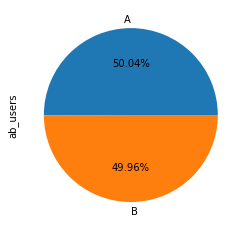

In [8]:
#Plot the variable ab_users to understanding easily the distribution of test groups
df['ab_users'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

### Analyzing Data

It’s time to analyze our data. 
For reminder, we need to recall that the sign-up process for MuscleHub has several steps:

* Take a fitness test with a personal trainer (only Group A).
* Fill out an application for the gym.
* Send in their payment for their first month's membership

Next we need to determine the distribution of people in each group who complete step 2 (application) in variable 'ab_apply' and final step (purchasing) in variable 'ab_purchase'.

In [9]:
#Determine the variable of completion ('ab_apply') and payment ('ab_purchase') for each group.
df['ab_apply'] = np.where(df['application_date'].isna(), 0, 1).astype('bool')
df['ab_purchase'] = np.where(df['purchase_date'].isna(), 0, 1).astype('bool')

df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_users,ab_apply,ab_purchase
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,False,False
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,False,False
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,True,True
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,True,True
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,False,False


In [10]:
#Calculate the number of completion ('ab_apply') and payment ('ab_purchase') for each group.
df_user = df.assign(applying= np.where(df['ab_apply']==True,1,0), not_applying=np.where(df['ab_apply']==False,1,0), purchasing=np.where(df['ab_purchase']==True,1,0), not_app_purchasing=np.where(df['ab_purchase']==False,1,0)).groupby('ab_users').agg({'ab_users':'count','applying':'sum','not_applying':'sum','purchasing':'sum','not_app_purchasing':'sum'}).rename(columns={
    'ab_users':'ab_total'}).reset_index()
df_user['not_purchasing'] = df_user.applying - df_user.purchasing
df_user = df_user[['ab_users', 'ab_total', 'applying', 'not_applying', 'purchasing', 'not_purchasing', 'not_app_purchasing']]
df_user

,ab_users,ab_total,applying,not_applying,purchasing,not_purchasing,not_app_purchasing
0,A,2504,250,2254,200,50,2304
1,B,2500,325,2175,250,75,2250


#### The Difference Between Group

Next we want to to know the difference between two group in percentage for two actions. In other words we will try to find the exact number of conversion rate for each step (applying and purchasing).

In [11]:
#Calculate the percentage
df_user['conversion_app']= df_user['applying'] / df_user['ab_total']
df_user['conversion_pur']= df_user['purchasing'] / df_user['ab_total']
df_user[['ab_users', 'conversion_app', 'conversion_pur']]

,ab_users,conversion_app,conversion_pur
0,A,0.09984,0.079872
1,B,0.13000,0.100000


The aggregate results showed a very small difference between group A and group B. For application conversion rate, group A only showed 9.9% compared to group B (13%). Meanwhile for groups that ended up for buying membership also showed the same results, 7.9% for group A and 10% for group B. 

The graph below also confirms the small difference between two groups, even the group B has a higher conversion rate than group A.

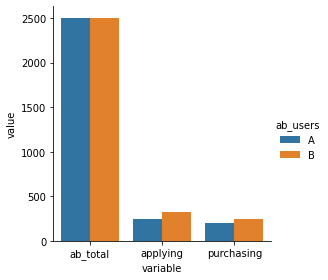

In [12]:
df_melted = pd.melt(df_user, id_vars=['ab_users'], value_vars=['ab_total', 'applying', 'purchasing'])
sns.catplot(x= 'variable', y='value', data=df_melted, hue='ab_users', kind='bar', height = 4)
plt.show()

#### Significancy

We already know that the aggregate difference between the two groups is a very small, even the treatment group (A) seems to have a lower conversion rate than a control group (B). But before decide the actions based on previous results, we need to confirm further based on statistical tests. Statistical tests are crucial when we want to use sample data to make conclusions about a population because these tests account for sample error. Using significance levels and p-values to determine when to reject the null hypothesis improves the probability that we will draw on the correct conclusion.

For this case, Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A. So that the null and alternate hypotheses are as follows:

* Null Hypothesis = There will no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.
* Alternate Hypothesis = There will be more visitors in Group B that will purchase membership than visitors in Group A that will purchase membership.


The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be:

𝛼 = 0.05

In [13]:
#Determine the paramater of each group
num_a, num_b = 2504, 2500
app_a, app_b = 250, 325
pur_a, pur_b = 200, 250
no_app_a, no_app_b = 2254, 2175
no_pur_a, no_pur_b = 2304, 2250

In [14]:
#Calaculate the significance of applicance for each group using Welsch’s t-test
from scipy.stats import ttest_ind
a_dist = np.zeros(num_a)
a_dist[:app_a] = 1
b_dist = np.zeros(num_b)
b_dist[:app_b] = 1
zscore, prob = ttest_ind(a_dist, b_dist, equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.05f} (two tailed), {prob/2:0.05f} (one tailed)")

#or 

a_results = df_user[df_user.ab_users == 'A']['applying']
b_results = df_user[df_user.ab_users == 'B']['applying']

test_result = stats.ttest_ind(a_results, b_results)

print('p_value = ', p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

Zscore is -3.35, p-value is 0.00082 (two tailed), 0.00041 (one tailed)


NameError: name 'stats' is not defined

In [15]:
#Calculate the significance of applicance for each group using Mann-Whitney U test
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.05f}")

Mann-Whitney U test for null hypothesis B <= A is 0.00041


In [16]:
#Calculate the significance of applicance for each group using Chi-squared test
from scipy.stats import chi2_contingency
contingency = [[app_a, no_app_a], [app_b, no_app_b]]
chi2_contingency(contingency)

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

In [17]:
#Calaculate the significance of purchasing of membership for each group using Welsch’s t-test
a_dist1 = np.zeros(num_a)
a_dist1[:pur_a] = 1
b_dist1 = np.zeros(num_b)
b_dist1[:pur_b] = 1
zscore, prob = ttest_ind(a_dist1, b_dist1, equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.05f} (two tailed), {prob/2:0.05f} (one tailed)")

Zscore is -2.49, p-value is 0.01283 (two tailed), 0.00642 (one tailed)


In [18]:
#Calaculate the significance of purchasing of membership for each group using Mann-Whitney U test
stat, p_value = mannwhitneyu(a_dist1, b_dist1, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.05f}")

Mann-Whitney U test for null hypothesis B <= A is 0.00642


In [19]:
#Calculate the significance of purchasing of membership for each group using Chi-squared test
contingency = [[pur_a, no_pur_a], [pur_b, no_pur_b]]
chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

In [20]:
#summarize p-value for each test method
data = {'test':['ttest2', 'ttest1', 'mannwhitneyu', 'chi2'],
        'p_value':[0.00082, 0.00041, 0.00041, 0.000964]}
data2 = {'test':['ttest2', 'ttest1', 'mannwhitneyu', 'chi2'],
        'p_value':[0.01283, 0.00642, 0.00642, 0.01472]}
p_value_app = pd.DataFrame(data)
p_value_purr = pd.DataFrame(data2)
p_value_app['signif'] = np.where(p_value_app['p_value'] < 0.05, True, False)
p_value_purr['signif'] = np.where(p_value_purr['p_value'] < 0.05, True, False)
print(p_value_app)

           test   p_value  signif
0        ttest2  0.000820    True
1        ttest1  0.000410    True
2  mannwhitneyu  0.000410    True
3          chi2  0.000964    True


In [21]:
print(p_value_purr)

           test  p_value  signif
0        ttest2  0.01283    True
1        ttest1  0.00642    True
2  mannwhitneyu  0.00642    True
3          chi2  0.01472    True


From various tests, we know that p-values for two actions (appliying and purchasing membership) using different tests compared to a significance threshold of 𝛼 = 0.05 indicates that there is a statistically signifant difference between the two groups (A and B). So the action should be continued or perform under right expectation.